In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
heights = pd.read_csv('C:/Users/trece/OneDrive/Desktop/heights.csv')

In [3]:
heights.head(10)

,AM_Height,PM_Height
0,1728.75,1720.25
1,1538.25,1528.50
2,1462.25,1452.50
3,1782.50,1776.50
4,1671.00,1667.00
5,1581.75,1571.00
6,1673.75,1664.50
7,1721.75,1708.50
8,1646.50,1636.00
9,1793.75,1781.75


# test for linearity and normality with a scatterplot

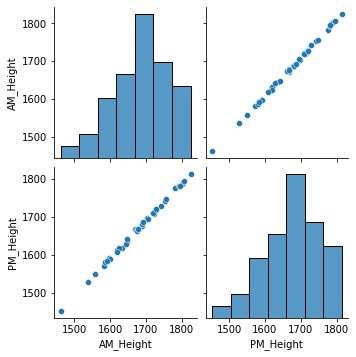

In [5]:
sns.pairplot(heights)

# make a regular histogram with a distribution curve on it

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AM_Height', ylabel='Density'>

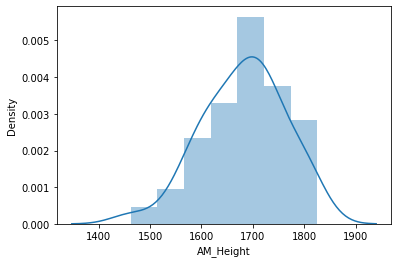

In [6]:
sns.distplot(heights['AM_Height'])

# test for homoscedasticity using sklearn and statsmodels assign variables to x and y

In [7]:
x = heights['AM_Height']
y = heights['PM_Height']

## build the model; be sure to use a name that makes sense

In [8]:
htsModel = sm.OLS(y,x).fit()

## then calculate the residuals and graph the values

In [12]:
pred_val = htsModel.fittedvalues.copy()
true_val = heights['AM_Height'].values.copy()
residual = true_val - pred_val

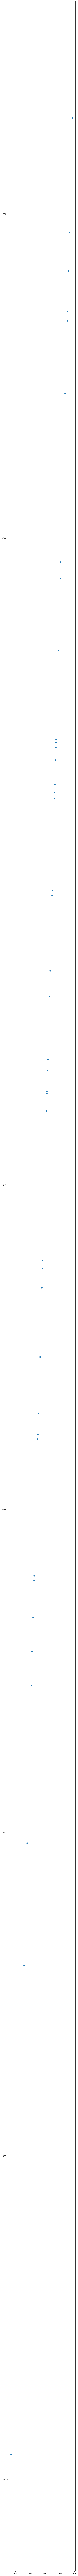

In [13]:
fig, ax = plt.subplots(figsize=(6, 235))
_ = ax.scatter(residual, pred_val)

# breusch pagan test

In [15]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(40.91347158491757, nan, 18913.311446162563, 3.855944268702337e-55)

# harvey collier test

In [16]:
sms.linear_harvey_collier(htsModel)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

# box cox transformation to transform the values to see if you can change for homoscedasticity then plot the values

In [17]:
transformed, _ = boxcox(heights['AM_Height'])

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

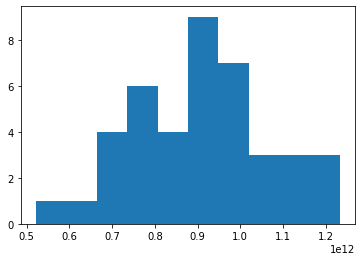

In [18]:
plt.hist(transformed)

# make a model of these values then create new residual values to re run for homoscedasticity; change the x to the new model transformed name

In [19]:
x = transformed
htsModel1 = sm.OLS(y,x).fit()
htsModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2347.
Date:                Sat, 02 Apr 2022   Prob (F-statistic):                    3.84e-37
Time:                        23:59:22   Log-Likelihood:                         -278.68
No. Observations:                  41   AIC:                                      559.4
Df Residuals:                      40   BIC:                                      561.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            1.8e-09   3.71e-11     48.450      0.000    1.72e-09    1.87e-09
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.516
Skew:                          -0.105   Prob(JB):                        0.773
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# test for mulicollinearity (when there are multiple independent variables) corr function

In [21]:
heights.corr()

,AM_Height,PM_Height
AM_Height,1.000000,0.999466
PM_Height,0.999466,1.000000


# then print out a heat map with sns.heatmap() use annot= True to print out the correlations on the heat map

In [29]:
sns.heatmap(transformed.corr(), annot = True)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

# screening for outliers

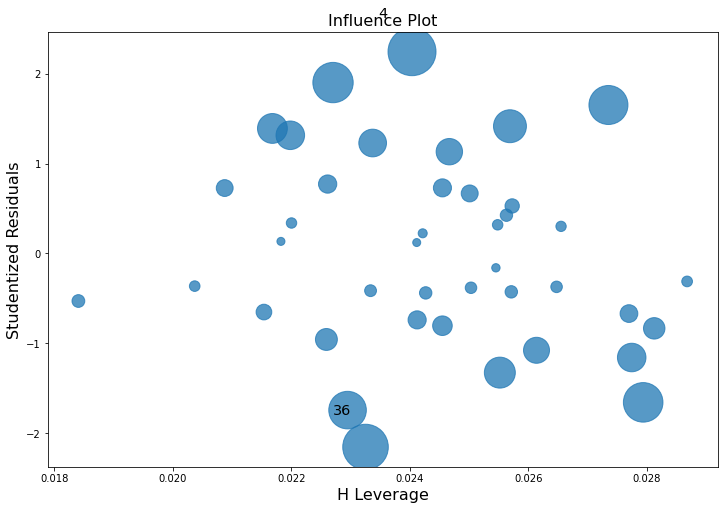

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.influence_plot(htsModel, alpha = .05, ax = ax, criterion = "cooks")

# interpreting the regression model use summary to call up all the data

In [33]:
htsModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                   5.17e-114
Time:                        00:22:32   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""